#                                       Trabalho 2

                                      Aluno: Raphael Dantas 

# 2 Sistemas de Recomendação


2.1 Conjunto de dados de classificações de filme

Nesta parte, você implementará o algoritmo de aprendizagem de filtragem colaborativa
e aplicá-lo-á a um conjunto de dados de avaliações de filmes. Este conjunto de dados consiste em classificações em uma escala de 1 a 5. O conjunto de dados tem nu = 943 usuários e nm = 1682 filmes.

In [2]:
from scipy.io import loadmat
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sb  
from scipy.io import loadmat  
%matplotlib inline

data = loadmat("ex8_movies.mat")

data



{'R': array([[1, 1, 0, ..., 1, 0, 0],
        [1, 0, 0, ..., 0, 0, 1],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'Y': array([[5, 4, 0, ..., 5, 0, 0],
        [3, 0, 0, ..., 0, 0, 5],
        [4, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Thu Dec  1 17:19:26 2011',
 '__version__': '1.0'}

A matriz Y (de ordem numero de lmes x numero de
usuarios) armazena as classicac~oes y(i;j) (de 1 a 5). A matriz R e uma matriz
de indicadores de valor binario, onde R(i; j) = 1 se o usuario j forneceu
uma classicac~ao para o lme i e R(i; j) = 0 em caso contrario.

In [2]:

Y = data['Y']  
R = data['R']  

Y.shape, R.shape


((1682, 943), (1682, 943))

2.2 Algoritmo de aprendizagem de filtragem colaborativa

In [3]:
users = 4  
movies = 5  
features = 3

params_data = loadmat('ex8_movieParams.mat')  

X = params_data['X']
Theta = params_data['Theta']
X.shape, Theta.shape


((1682, 10), (943, 10))

2.2.1 Função de custo da filtragem colaborativa

In [4]:
%run -i "cofi_cost_func.py"

X_sub = X[:movies, :features]  
Theta_sub = Theta[:users, :features]  
Y_sub = Y[:movies, :users]  
R_sub = R[:movies, :users]

params = np.concatenate((np.ravel(X_sub), np.ravel(Theta_sub)))

J,grad = custoGradiente(params, Y_sub, R_sub, features)

print("Valor do custo: %.4f" %J)

Valor do custo: 22.2246


2.2.2 Gradiente de filtragem colaborativa

In [5]:
print("Valor do Gradiente:")
print(grad)

Valor do Gradiente:
[ -2.52899165   7.57570308  -1.89979026  -0.56819597   3.35265031
  -0.52339845  -0.83240713   4.91163297  -0.76677878  -0.38358278
   2.26333698  -0.35334048  -0.80378006   4.74271842  -0.74040871
 -10.5680202    4.62776019  -7.16004443  -3.05099006   1.16441367
  -3.47410789   0.           0.           0.           0.
   0.           0.        ]


2.3 Aprendizado de Recomendações para Filmes


Relizando a leitura da lista de filmes para recomendações

In [35]:
from scipy.optimize import minimize
%run -i "load_movie_list.py"
%run -i "normalize_ratings.py"
%run -i "cofi_cost_func2.py"

movieList = load_movie_list()

#  Inicia o vetor de avaliacoes do novo usuario

my_ratings = np.zeros(1682)



# Por exemplo, Toy Story (1995) tem ID 1; sendo assim, para atribuir avaliacao "4", faça:

my_ratings[0] = 4



# Ou suponha que voce nao gostou de Silence of the Lambs (1991):

my_ratings[97] = 2



# Abaixo, sao definidas as avaliacoes para outros filmes:

my_ratings[6] = 3

my_ratings[11] = 5

my_ratings[53] = 4

my_ratings[63] = 5

my_ratings[65] = 3

my_ratings[68] = 5

my_ratings[182] = 4

my_ratings[225] = 5

my_ratings[354] = 5



print('Avaliacoes do novo usuario:')

for i in range(len(my_ratings)):

    if my_ratings[i] > 0:

        print('\tAvaliou %d para %s' % (my_ratings[i], movieList[i]))
        
        
        


Avaliacoes do novo usuario:
	Avaliou 4 para Toy Story (1995)
	Avaliou 3 para Twelve Monkeys (1995)
	Avaliou 5 para Usual Suspects, The (1995)
	Avaliou 4 para Outbreak (1995)
	Avaliou 5 para Shawshank Redemption, The (1994)
	Avaliou 3 para While You Were Sleeping (1995)
	Avaliou 5 para Forrest Gump (1994)
	Avaliou 2 para Silence of the Lambs, The (1991)
	Avaliou 4 para Alien (1979)
	Avaliou 5 para Die Hard 2 (1990)
	Avaliou 5 para Sphere (1998)


Realizando algumas avaliações e sugestão Apos treinamento do modelo, e possivel realizar recomendacoes por meio da computacao da matriz de predicoes.

In [7]:

data = loadmat('ex8_movies.mat')

Y = data['Y']

R = data['R'].astype(bool)


#  Adiciona algumas avaliacoes a matriz

Y = np.column_stack((my_ratings, Y))

R = np.column_stack((my_ratings, R)).astype(bool)


#  Normaliza avaliacoes

Ynorm, Ymean = normalize_ratings(Y, R)

num_users = Y.shape[1]

num_movies = Y.shape[0]

num_features = 10

# Define parametros iniciais (Theta, X)

X = np.random.rand(num_movies, num_features)

Theta = np.random.rand(num_users, num_features)


initial_parameters = np.hstack((X.T.flatten(), Theta.T.flatten()))

# fator de regularizacao

Lambda = 10

costFunc = lambda p: cofi_cost_func(p, Ynorm, R, num_users, num_movies, num_features, Lambda)[0]

gradFunc = lambda p: cofi_cost_func(p, Ynorm, R, num_users, num_movies, num_features, Lambda)[1]


result = minimize(costFunc, initial_parameters, method='CG', jac=gradFunc, options={'disp': True, 'maxiter': 1000.0})

theta = result.x

cost = result.fun

# Extrai as matrizes X e Theta a partir de theta

X = theta[:num_movies*num_features].reshape(num_movies, num_features)

Theta = theta[num_movies*num_features:].reshape(num_users, num_features)



print('Aprendizado do Sistema de Recomendação finalizado.')

## ================== Realizacao de recomendacoes ====================

#  Apos treinamento do modelo, e possivel realizar recomendacoes por meio

#  da computacao da matriz de predicoes.

#

p = X.dot(Theta.T)

my_predictions = p[:, 0] + Ymean

movieList = load_movie_list()

# ordena predicoes em ordem decrescente

pre=np.array([[idx, p] for idx, p in enumerate(my_predictions)])

post = pre[pre[:,1].argsort()[::-1]]

r = post[:,1]

ix = post[:,0]


print('\nRecomendacoes principais:')

for i in range(10):

    j = int(ix[i])

    print('\tPrevisão de avaliacao %.1f para %s' % (my_predictions[j], movieList[j]))



print('\nAvaliacoes originais fornecidas:')

for i in range(len(my_ratings)):

    if my_ratings[i] > 0:

        print('\tAvaliou %d para %s' % (my_ratings[i], movieList[i]))

Optimization terminated successfully.
         Current function value: 35118.790099
         Iterations: 360
         Function evaluations: 533
         Gradient evaluations: 533
Aprendizado do Sistema de Recomendação finalizado.

Recomendacoes principais:
	Previsão de avaliacao 5.0 para Great Day in Harlem, A (1994)
	Previsão de avaliacao 4.9 para Shawshank Redemption, The (1994)
	Previsão de avaliacao 4.8 para Man Who Would Be King, The (1975)
	Previsão de avaliacao 4.8 para Godfather: Part II, The (1974)
	Previsão de avaliacao 4.8 para Usual Suspects, The (1995)
	Previsão de avaliacao 4.7 para Singin' in the Rain (1952)
	Previsão de avaliacao 4.7 para Cinema Paradiso (1988)
	Previsão de avaliacao 4.6 para Amadeus (1984)
	Previsão de avaliacao 4.6 para Blade Runner (1982)
	Previsão de avaliacao 4.6 para Close Shave, A (1995)

Avaliacoes originais fornecidas:
	Avaliou 4 para Toy Story (1995)
	Avaliou 3 para Twelve Monkeys (1995)
	Avaliou 5 para Usual Suspects, The (1995)
	Avaliou 4 pa

2.4 Filtragem Colaborativa - metodo baseado em memoria

Realizando a leitura dos dataset

In [69]:
### import pandas as pd
import numpy as np
import math
import re
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import seaborn as sns
#from surprise import Reader, Dataset, SVD, evaluate
sns.set_style("darkgrid")

# Skip date
#df = pd.read_csv('TrainingRatings.txt', header = None, names = ['Cust_Id','Movie_Id','Rating'], usecols = [0,2])
df = pd.read_csv('combined_data_1.txt', header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])

df['Rating'] = df['Rating'].astype(float)

print('Dataset 1 shape: {}'.format(df.shape))
print('-Dataset examples-')
print(df.iloc[::5000000, :])

Dataset 1 shape: (24058263, 2)
-Dataset examples-
          Cust_Id  Rating
0              1:     NaN
5000000   2560324     4.0
10000000  2271935     2.0
15000000  1921803     2.0
20000000  1933327     3.0


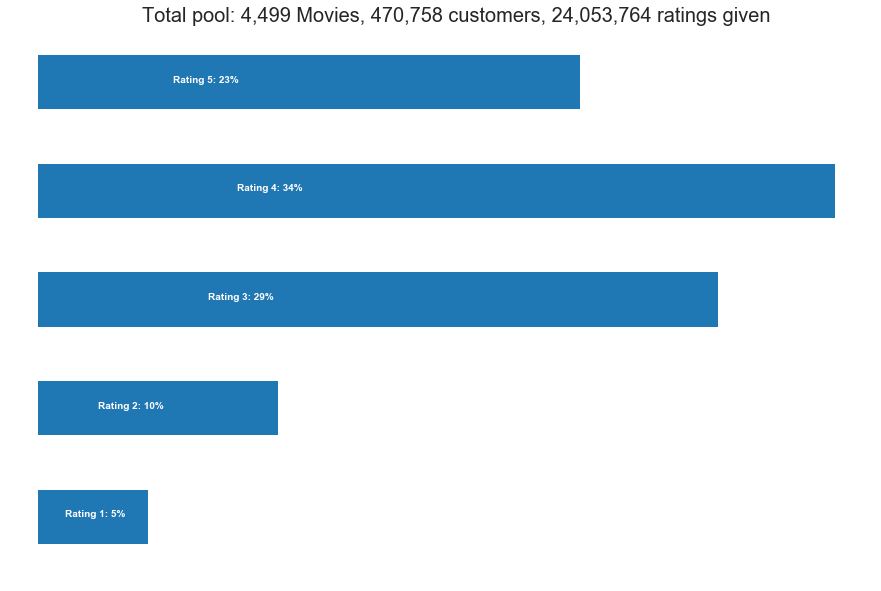

In [70]:
p = df.groupby('Rating')['Rating'].agg(['count'])

# get movie count
movie_count = df.isnull().sum()[1]

# get customer count
cust_count = df['Cust_Id'].nunique() - movie_count

# get rating count
rating_count = df['Cust_Id'].count() - movie_count

ax = p.plot(kind = 'barh', legend = False, figsize = (15,10))
plt.title('Total pool: {:,} Movies, {:,} customers, {:,} ratings given'.format(movie_count, cust_count, rating_count), fontsize=20)
plt.axis('off')

for i in range(1,6):
    ax.text(p.iloc[i-1][0]/4, i-1, 'Rating {}: {:.0f}%'.format(i, p.iloc[i-1][0]*100 / p.sum()[0]), color = 'white', weight = 'bold')

Podemos ver que a classificação tende a ser relativamente positiva (> 3). Isto pode ser devido ao fato de que os clientes infelizes tendem a apenas sair em vez de fazer esforços para avaliar. Podemos manter isso em mente. Baixa classificação filmes significam que eles são geralmente muito ruim.

Pode observar que o arquivo possui uma enorme quantidade de filmes. Se tentar adicionar filme ID coluna exigirá muito da memória. Dessa forma, primeiramente criando uma disposição numpy com comprimento correto a seguir adiciono a disposição inteira como a coluna no dataframe.

In [71]:
df_nan = pd.DataFrame(pd.isnull(df.Rating))
df_nan = df_nan[df_nan['Rating'] == True]
df_nan = df_nan.reset_index()

movie_np = []
movie_id = 1

for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):
    # numpy approach
    temp = np.full((1,i-j-1), movie_id)
    movie_np = np.append(movie_np, temp)
    movie_id += 1

# Account for last record and corresponding length
# numpy approach
last_record = np.full((1,len(df) - df_nan.iloc[-1, 0] - 1),movie_id)
movie_np = np.append(movie_np, last_record)

print('Movie numpy: {}'.format(movie_np))
print('Length: {}'.format(len(movie_np)))


Movie numpy: [1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]
Length: 24053764


Esta sendo Removido filmes com opiniões pouco populares e cliente que são relativamente menos ativos para que possa ter uma melhoria significativa na eficiência, uma vez que os filmes impopulares e  clientes não ativos ainda ocupam mesmo volume cque os filmes populares e clientes ativos na visão da matriz (NaN ainda ocupam espaço). 

In [73]:
# remove those Movie ID rows
df = df[pd.notnull(df['Rating'])]

df['Movie_Id'] = movie_np.astype(int)
df['Cust_Id'] = df['Cust_Id'].astype(int)
print('-Dataset examples-')
print(df.iloc[::5000000, :])

-Dataset examples-
          Cust_Id  Rating  Movie_Id
1         1488844     3.0         1
5000996    501954     2.0       996
10001962   404654     5.0      1962
15002876   886608     2.0      2876
20003825  1193835     2.0      3825


In [74]:
f = ['count','mean']

df_movie_summary = df.groupby('Movie_Id')['Rating'].agg(f)
df_movie_summary.index = df_movie_summary.index.map(int)
movie_benchmark = round(df_movie_summary['count'].quantile(0.8),0)
drop_movie_list = df_movie_summary[df_movie_summary['count'] < movie_benchmark].index

print('Movie minimum times of review: {}'.format(movie_benchmark))

df_cust_summary = df.groupby('Cust_Id')['Rating'].agg(f)
df_cust_summary.index = df_cust_summary.index.map(int)
cust_benchmark = round(df_cust_summary['count'].quantile(0.8),0)
drop_cust_list = df_cust_summary[df_cust_summary['count'] < cust_benchmark].index

print('Customer minimum times of review: {}'.format(cust_benchmark))

Movie minimum times of review: 3884.0
Customer minimum times of review: 79.0


In [75]:
print('Original Shape: {}'.format(df.shape))
df = df[~df['Movie_Id'].isin(drop_movie_list)]
df = df[~df['Cust_Id'].isin(drop_cust_list)]
print('After Trim Shape: {}'.format(df.shape))
print('-Data Examples-')
print(df.iloc[::1000, :])

Original Shape: (24053764, 3)
After Trim Shape: (13528427, 3)
-Data Examples-
          Cust_Id  Rating  Movie_Id
5109       785314     1.0         8
7163       999901     5.0         8
9223       778383     3.0         8
11277      994565     1.0         8
13395     1833221     4.0         8
15484     1256465     4.0         8
17604     2583580     4.0         8
19622     1403206     3.0         8
26168      591587     3.0        17
28350     2238629     2.0        17
30634      290874     3.0        17
32279      139212     3.0        18
33565      825485     4.0        18
34829     2254090     4.0        18
36060     1498149     3.0        18
37333     2130617     4.0        18
38590      358553     5.0        18
39811     1934423     5.0        18
41075      328353     3.0        18
46627     2602480     2.0        26
48355     2441155     2.0        26
50056      715516     3.0        26
51778     2569952     2.0        26
53603      563381     4.0        28
55039     2506101     

In [76]:
df_p = pd.pivot_table(df,values='Rating',index='Cust_Id',columns='Movie_Id')

print(df_p.shape)

(95325, 900)


Realizando o mapeamento de filmes

In [77]:
df_title = pd.read_csv('movie_titles.csv', encoding = "ISO-8859-1", header = None, names = ['Movie_Id', 'Year', 'Name'])
df_title.set_index('Movie_Id', inplace = True)
print (df_title.head(10))

            Year                          Name
Movie_Id                                      
1         2003.0               Dinosaur Planet
2         2004.0    Isle of Man TT 2004 Review
3         1997.0                     Character
4         1994.0  Paula Abdul's Get Up & Dance
5         2004.0      The Rise and Fall of ECW
6         1997.0                          Sick
7         1992.0                         8 Man
8         2004.0    What the #$*! Do We Know!?
9         1991.0      Class of Nuke 'Em High 2
10        2001.0                       Fighter


Realizando o ajuste das 100k linhas por conta do tamanho dos dados

In [78]:
from surprise import Reader, Dataset, SVD, evaluate

reader = Reader()

# get just top 100K rows for faster run time
data = Dataset.load_from_df(df[['Cust_Id', 'Movie_Id', 'Rating']][:100000], reader)
data.split(n_folds=3)

svd = SVD()
evaluate(svd, data, measures=['RMSE', 'MAE'])

C:\Users\rapha\Anaconda3\lib\site-packages\surprise\evaluate.py:66: UserWarning: The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.
  'model_selection.cross_validate() instead.', UserWarning)


Evaluating RMSE, MAE of algorithm SVD.

------------
Fold 1
RMSE: 0.9876
MAE:  0.7965
------------
Fold 2
RMSE: 0.9812
MAE:  0.7875
------------
Fold 3
RMSE: 0.9866
MAE:  0.8013
------------
------------
Mean RMSE: 0.9852
Mean MAE : 0.7951
------------
------------


C:\Users\rapha\Anaconda3\lib\site-packages\surprise\dataset.py:193: UserWarning: Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 
  UserWarning)


CaseInsensitiveDefaultDict(list,
                           {'mae': [0.796466325041173,
                             0.7874709374715761,
                             0.801293482910586],
                            'rmse': [0.987647485917114,
                             0.9812324211048468,
                             0.9866135360832958]})

Para realizar teste foi escolhido o usuario 785314 para verificação de quais as avaliacoes foram feitas por ele

In [79]:
df_785314 = df[(df['Cust_Id'] == 785314) & (df['Rating'] == 5)]
df_785314 = df_785314.set_index('Movie_Id')
df_785314 = df_785314.join(df_title)['Name']
print(df_785314)

Movie_Id
175                                        Reservoir Dogs
311                                               Ed Wood
329                                                 Dogma
331                                           Chasing Amy
788                                                Clerks
798                                                  Jaws
907                                       Animal Crackers
985                                             The Mummy
1552                                          Black Adder
1905    Pirates of the Caribbean: The Curse of the Bla...
2000                          Four Weddings and a Funeral
2122                                 Being John Malkovich
2342                                        Super Size Me
2360                                  Singin' in the Rain
2430                           Alien: Collector's Edition
2443                             Like Water for Chocolate
2452        Lord of the Rings: The Fellowship of the Ring
2465 

Agora realizando a predição do usuário tendo como base os dados fornecidos

In [80]:
user_785314 = df_title.copy()
user_785314 = user_785314.reset_index()
user_785314 = user_785314[~user_785314['Movie_Id'].isin(drop_movie_list)]

# getting full dataset
data = Dataset.load_from_df(df[['Cust_Id', 'Movie_Id', 'Rating']], reader)

trainset = data.build_full_trainset()
svd.train(trainset)

user_785314['Estimate_Score'] = user_785314['Movie_Id'].apply(lambda x: svd.predict(785314, x).est)

user_785314 = user_785314.drop('Movie_Id', axis = 1)

user_785314 = user_785314.sort_values('Estimate_Score', ascending=False)
print(user_785314.head(10))

C:\Users\rapha\Anaconda3\lib\site-packages\surprise\prediction_algorithms\algo_base.py:51: UserWarning: train() is deprecated. Use fit() instead
  warnings.warn('train() is deprecated. Use fit() instead', UserWarning)


        Year                                               Name  \
3149  2000.0                   Monty Python: The Life of Python   
2101  1994.0                             The Simpsons: Season 6   
1551  1983.0                                        Black Adder   
3520  2000.0                                 Coupling: Season 1   
2171  1991.0                             The Simpsons: Season 3   
3045  1990.0                  The Simpsons: Treehouse of Horror   
493   1983.0  Monty Python's The Meaning of Life: Special Ed...   
4114  1999.0                            The Simpsons: Bart Wars   
3167  1987.0                          Evil Dead 2: Dead by Dawn   
4391  1993.0                                   Army of Darkness   

      Estimate_Score  
3149        4.884688  
2101        4.806203  
1551        4.797537  
3520        4.796494  
2171        4.762671  
3045        4.751675  
493         4.747026  
4114        4.670011  
3167        4.599553  
4391        4.598969  


Desta forma e feito a correlação de preferencia de pessoas Pearsons R para medir a correlação linear entre os escores de revisão de todos os pares de filmes, então e fornecido os 10 melhores filmes com correlações mais altas:

In [85]:
def recommend(movie_title, min_count):
    print("Para o Filme ({})".format(movie_title))
    print("- Os 10 Filmes mais recomendados baseado na correlação Pessoal- ")
    i = int(df_title.index[df_title['Name'] == movie_title][0])
    target = df_p[i]
    similar_to_target = df_p.corrwith(target)
    corr_target = pd.DataFrame(similar_to_target, columns = ['PearsonR'])
    corr_target.dropna(inplace = True)
    corr_target = corr_target.sort_values('PearsonR', ascending = False)
    corr_target.index = corr_target.index.map(int)
    corr_target = corr_target.join(df_title).join(df_movie_summary)[['PearsonR', 'Name', 'count', 'mean']]
    print(corr_target[corr_target['count']>min_count][:10].to_string(index=False))

Realizando a escolha do filme de escolha do usuário para fazer a recomendação.

In [86]:
recommend("Blade: Trinity", 0)


Para o Filme (Blade: Trinity)
- Os 10 Filmes mais recomendados baseado na correlação Pessoal- 
PearsonR                              Name  count      mean
                                                           
1.000000                    Blade: Trinity  42727  3.548974
0.452470                        Species II   7526  2.781424
0.431088                      The Avengers   4412  2.334769
0.424923                      The Pacifier  39875  3.557643
0.424795             The Amityville Horror  19867  3.482408
0.417413                Dungeons & Dragons   5797  2.634639
0.414633  Teenage Mutant Ninja Turtles III   4242  2.590759
0.413722                           Hostage  48617  3.762758
0.409807                              Taxi  32027  3.362475
0.409117                          Earthsea   5157  3.337599


In [87]:
recommend("What the #$*! Do We Know!?", 0)

Para o Filme (What the #$*! Do We Know!?)
- Os 10 Filmes mais recomendados baseado na correlação Pessoal- 
PearsonR                                      Name  count      mean
                                                                   
1.000000                What the #$*! Do We Know!?  14910  3.189805
0.326285                          The 10th Kingdom   4532  3.669903
0.324225              Star Trek: Voyager: Season 5   4175  4.111377
0.316818                                  Together   3958  3.889843
0.312717      Star Trek: Deep Space Nine: Season 5   4373  4.160759
0.309444           To Gillian on her 37th Birthday   4261  3.102793
0.289334              Murder on the Orient Express   4785  3.743783
0.288829        Nausicaa of the Valley of the Wind   6674  4.189542
0.288389  Star Trek: The Next Generation: Season 5   8978  4.247494
0.286320         The Life & Death of Peter Sellers   4702  3.099957


In [88]:
recommend("X2: X-Men United", 0)

Para o Filme (X2: X-Men United)
- Os 10 Filmes mais recomendados baseado na correlação Pessoal- 
PearsonR                      Name   count      mean
                                                    
1.000000          X2: X-Men United   98720  3.932202
0.342535             Batman Begins   54922  4.236699
0.313025  Mortal Kombat: The Movie    7633  3.165466
0.311354      The Matrix: Reloaded  106807  3.514704
0.303351    Todd McFarlane's Spawn    4684  3.612511
0.295555   The Matrix: Revolutions   60415  3.517040
0.295549                Species II    7526  2.781424
0.294434                 Daredevil   62628  2.979642
0.293918      Smallville: Season 1   10082  4.169609
0.293820            Blade: Trinity   42727  3.548974


3 Aprendizado de Comitês

Reproduzindo a implementação fornecida no notebook apresentando em um mesmo gráfico (que plota a taxa de erro contra a quantidade de iterações) 

In [17]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_hastie_10_2
import matplotlib.pyplot as plt

""" HELPER FUNCTION: GET ERROR RATE ========================================="""
def get_error_rate(pred, Y):
    return sum(pred != Y) / float(len(Y))

""" HELPER FUNCTION: PRINT ERROR RATE ======================================="""
def print_error_rate(err):
    
    print ('Error rate: Training: %.4f - Test: %.4f' % err)

""" HELPER FUNCTION: GENERIC CLASSIFIER ====================================="""
def generic_clf(Y_train, X_train, Y_test, X_test, clf):
    clf.fit(X_train,Y_train)
    pred_train = clf.predict(X_train)
    pred_test = clf.predict(X_test)
    return get_error_rate(pred_train, Y_train), \
        get_error_rate(pred_test, Y_test)

In [18]:
""" ADABOOST IMPLEMENTATION ================================================="""
def adaboost_clf(Y_train, X_train, Y_test, X_test, M, clf):
    n_train, n_test = len(X_train), len(X_test)
    # Initialize weights
    w = np.ones(n_train) / n_train
    pred_train, pred_test = [np.zeros(n_train), np.zeros(n_test)]
    for i in range(M):
        # Fit a classifier with the specific weights
        clf.fit(X_train, Y_train, sample_weight = w)
        pred_train_i = clf.predict(X_train)
        pred_test_i = clf.predict(X_test)
        # Indicator function
        miss = [int(x) for x in (pred_train_i != Y_train)]
        # Equivalent with 1/-1 to update weights
        miss2 = [x if x==1 else -1 for x in miss]
        # Error
        err_m = np.dot(w,miss) / sum(w)
        # Alpha
        alpha_m = 0.5 * np.log( (1 - err_m) / float(err_m))
        # New weights
        w = np.multiply(w, np.exp([float(x) * alpha_m for x in miss2]))
        # Add to prediction
        pred_train = [sum(x) for x in zip(pred_train,[x * alpha_m for x in pred_train_i])]
        pred_test = [sum(x) for x in zip(pred_test,[x * alpha_m for x in pred_test_i])]
        
    pred_train, pred_test = np.sign(pred_train), np.sign(pred_test)
    # Return error rate in train and test set
    return get_error_rate(pred_train, Y_train), \
        get_error_rate(pred_test, Y_test)

In [33]:
# Read data
x, y = make_hastie_10_2()
df = pd.DataFrame(x)
df['Y'] = y
# Split into training and test set
train, test = train_test_split(df, test_size = 0.2)
X_train, Y_train = train.iloc[:,:-1], train.iloc[:,-1]
X_test, Y_test = test.iloc[:,:-1], test.iloc[:,-1]

# Fit a simple decision tree first
clf_tree = DecisionTreeClassifier(max_depth = 1, random_state = 1)
er_tree = generic_clf(Y_train, X_train, Y_test, X_test, clf_tree)

In [34]:
# Fit Adaboost classifier using a decision tree as base estimator
# Test with different number of iterations
er_train, er_test = [er_tree[0]], [er_tree[1]]
x_range = range(10, 410, 10)
for i in x_range:
    er_i = adaboost_clf(Y_train, X_train, Y_test, X_test, i, clf_tree)
    er_train.append(er_i[0])
    er_test.append(er_i[1])
    #er_i = adaboost_clf(Y_train, X_train, Y_test, X_test, 50, clf_tree)
    #er_train.append(er_i[0])
    #er_test.append(er_i[1])

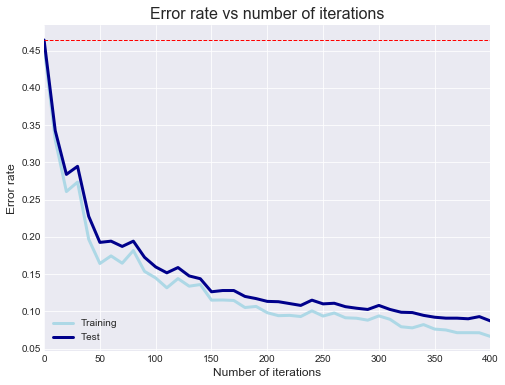

In [22]:
%run -i "plot_error_rate.py"
# Compare error rate vs number of iterations
plot_error_rate(er_train, er_test)